# Gradient Boosting

In [1]:
from sklearn.datasets import load_boston
from sklearn import cross_validation, datasets, metrics, tree, ensemble, learning_curve, linear_model
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

c:\users\higer\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
c:\users\higer\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\learning_curve.py:22: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be removed in 0.20
  DeprecationWarning)


Будем работать с датасетом Boston

In [2]:
X, y = load_boston(return_X_y=True)

In [3]:
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, 
                                                                     test_size=0.25, 
                                                                     random_state=0)

Посмотрим описание датасета

In [4]:
print(load_boston().DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

Cреднеквадратичная ошибка (в задаче регрессии):
\begin{equation}L(y,z) = {(y−z)}^2\end{equation}

In [5]:
def der_L(y_true, y_pred):
    return y_true - y_pred

Функция, которая будет вычислять прогноз построенной на данный момент композиции деревьев на выборке X

In [6]:
def gbm_predict(X):
    return [sum([coeff * algo.predict([x])[0] for algo, coeff in zip
                 (base_algorithms_list, coefficients_list)]) for x in X]

In [7]:
base_algorithms_list  = []
coefficients_list = []

"""Обучаем 50 решающих деревьев с коэффицентами равными 0.9"""
for i in range(50):
    coefficients_list.append(0.9)
    regression = tree.DecisionTreeRegressor(max_depth=5, random_state=42)
    #Сначала обучаем первое дерево
    if i == 0: 
        regression.fit(X_train, y_train)
    #Для остальных пытаемся уменьшить ошибку
    else: 
        regression.fit(X_train, der_L(y_train, gbm_predict(X_train)))
    base_algorithms_list.append(regression)

RMSE = np.sqrt(metrics.mean_squared_error(y_test, gbm_predict(X_test)))
print(RMSE)

5.090512902628062


Попробуем уменьшать вес перед каждым алгоритмом

In [8]:
base_algorithms_list  = []
coefficients_list = []

"""Обучаем 50 решающих деревьев с коэффицентами равными 0.9"""
for i in range(50):
    regression = tree.DecisionTreeRegressor(max_depth=5, random_state=42)
    #Сначала обучаем первое дерево
    if i == 0: 
        regression.fit(X_train, y_train)
    #Для остальных пытаемся уменьшить ошибку
    else: 
        regression.fit(X_train, der_L(y_train, gbm_predict(X_train)))
    base_algorithms_list.append(regression)
    coefficients_list.append(0.9 / (1.0 + i))

RMSE = np.sqrt(metrics.mean_squared_error(y_test, gbm_predict(X_test)))
print(RMSE)

5.018472950509014


Посмотрим как с ростом количества деревьев меняется ошибка

Text(0,0.5,'Среднеквадратичная ошибка')

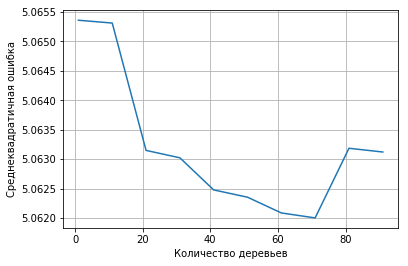

In [9]:
err = []
rang = np.arange(1, 100, 10)

for i in rang:
    regression = tree.DecisionTreeRegressor(max_depth=5, random_state=42)
    #Сначала обучаем первое дерево
    if i == 0: 
        regression.fit(X_train, y_train)
    #Для остальных пытаемся уменьшить ошибку
    else: 
        regression.fit(X_train, der_L(y_train, gbm_predict(X_train)))
    base_algorithms_list.append(regression)
    coefficients_list.append(0.9 / (1.0 + i))
    err.append(np.sqrt(metrics.mean_squared_error(y_test, gbm_predict(X_test))))
    
plt.grid(True)
plt.plot(rang, err)
plt.xlabel('Количество деревьев')
plt.ylabel('Среднеквадратичная ошибка')

Теперь попробуем еще изменять глубину

Text(0,0.5,'Среднеквадратичная ошибка')

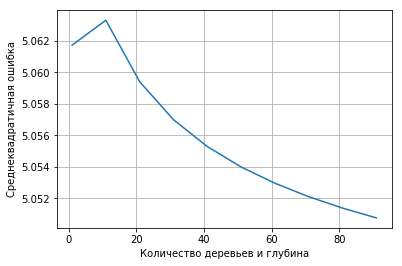

In [11]:
err = []
rang = np.arange(1, 100, 10)

for i in rang:
    regression = tree.DecisionTreeRegressor(max_depth=i, random_state=42)
    #Сначала обучаем первое дерево
    if i == 0: 
        regression.fit(X_train, y_train)
    #Для остальных пытаемся уменьшить ошибку
    else: 
        regression.fit(X_train, der_L(y_train, gbm_predict(X_train)))
    base_algorithms_list.append(regression)
    coefficients_list.append(0.9 / (1.0 + i))
    err.append(np.sqrt(metrics.mean_squared_error(y_test, gbm_predict(X_test))))
    
plt.grid(True)
plt.plot(rang, err)
plt.xlabel('Количество деревьев и глубина')
plt.ylabel('Среднеквадратичная ошибка')

Сравним бустинг и линейную регрессию 

In [12]:
linear_regression = linear_model.LinearRegression()
linear_regression.fit(X_train, y_train)

predict = linear_regression.predict(X_test)
RMSE = np.sqrt(metrics.mean_squared_error(y_test, predict))

print(RMSE)

5.458072843434627
